<a href="https://colab.research.google.com/github/1da1ana1/Case_Itau/blob/main/CaseItau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importando bibliotecas
Primeiro, é importante importar todas as bibliotecas que serão usadas para análise, além do banco de dados.


In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/caseItau/DadosTextil.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Entendendo os tipos de dados e o que contêm no banco de dados

In [6]:
#Esse comando permite com que eu visualize as primeiras linhas com dados e o título das colunas do banco de dados
df.head()

,Mercado,Nome Cliente,Cidade,Num Entregas,Peso equivalente,Linhas Pedido,Numero Notas Fiscais,Volumes,Faturamento Anual,Custo Produto,Custos Fixos,Custos Operacionais Relativos,Frete,$ Entregas,$ Frete Peso,Lucro,Lucratividade,Unnamed: 17,Unnamed: 18
0,Têxtil,Customer 1,DIADEMA,2,609.5675,4,2,24,17434.020,9414.3708,1516.759740,4171.4020,122.5,16.6,105.9,2208.987460,0.126706,NaN,NaN
1,Têxtil,Customer 2,EMBU-GUACU,4,1119.8125,8,4,44,5939.875,3207.5325,516.769125,3203.9875,150.0,33.2,116.8,-1138.414125,-0.191656,NaN,"Custo Nota fiscal = R$ 2,50"
2,Têxtil,Customer 3,DIADEMA,28,1045.8075,56,28,66,63449.550,34262.7570,5520.110850,11446.9550,885.0,232.4,652.6,11334.727150,0.178642,NaN,"Custo Cobrança bancária = R$ 1,00"
3,Têxtil,Customer 4,SAO PAULO,26,2471.3775,80,26,68,39779.635,21481.0029,3460.828245,8679.9635,570.0,215.8,354.2,5587.840355,0.140470,NaN,"Custo de uma entrega = R$ 8,30"
4,Têxtil,Customer 5,SAO CAETANO SUL,8,9536.9075,28,14,2832,64972.495,35085.1473,5652.607065,10423.2495,990.0,66.4,923.6,12821.491140,0.197337,NaN,NaN


In [89]:
#Com esse comando eu consigo ver uma descrição geral dos dados da planilha.
round(df.describe(),2)

,num_entregas,peso_equivalente_kg,linhas_pedido,num_notas_fiscais,volumes,faturamento_anual_por_cli,custo_produto,custos_fixos,custos_operacionais_relativos,frete,entregas_r$,frete_r$,lucro,lucratividade_percentual,contribuicao_pct,contribuicao_clientes
count,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00
mean,22.11,5323.75,118.84,27.06,531.03,88731.97,47915.26,7719.68,13555.49,840.62,183.52,657.10,18700.92,-0.29,0.69,0.69
std,34.86,19736.02,626.56,66.67,2370.95,233086.90,125866.93,20278.56,26833.04,2332.69,289.37,2114.96,58847.07,0.75,1.81,1.81
min,2.00,9.74,4.00,2.00,2.00,640.73,345.99,55.74,2432.07,0.00,16.60,-149.40,-2650.90,-3.50,0.00,0.00
25%,4.00,186.96,8.00,4.00,14.00,4426.67,2390.40,385.12,3088.67,80.00,33.20,45.90,-1664.65,-0.40,0.03,0.03
50%,10.00,792.63,24.00,12.00,42.00,16057.14,8670.85,1396.97,5214.74,295.00,83.00,189.50,385.58,0.03,0.12,0.12
75%,26.00,3754.78,56.00,28.00,204.00,57988.76,31313.93,5045.02,10353.91,842.50,215.80,597.20,8136.36,0.15,0.45,0.45
max,270.00,216838.54,7312.00,716.00,20404.00,1607974.80,868306.39,139893.81,197919.48,23982.50,2241.00,22588.10,377872.62,0.27,12.50,12.50


In [8]:
#Com esse comando vejo as informações do tipo de dado que contido em cada coluna do banco de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Mercado                        145 non-null    object 
 1   Nome Cliente                   145 non-null    object 
 2   Cidade                         145 non-null    object 
 3   Num Entregas                   145 non-null    int64  
 4   Peso equivalente               145 non-null    float64
 5   Linhas Pedido                  145 non-null    int64  
 6   Numero Notas Fiscais           145 non-null    int64  
 7   Volumes                        145 non-null    int64  
 8   Faturamento Anual              145 non-null    float64
 9   Custo Produto                  145 non-null    float64
 10  Custos Fixos                   145 non-null    float64
 11  Custos Operacionais Relativos  145 non-null    float64
 12  Frete                          145 non-null    flo

#3. Seção de tratamento de dados

In [9]:
#Com esse comando consigo ver a nomenclatura(index) das colunas
#É importante pois os nomes serão usados para realizar a manipulação dos dados
df.columns

Index(['Mercado', 'Nome Cliente', 'Cidade', 'Num Entregas', 'Peso equivalente',
       'Linhas Pedido', 'Numero Notas Fiscais', 'Volumes', 'Faturamento Anual',
       'Custo Produto', 'Custos Fixos', 'Custos Operacionais Relativos',
       'Frete', '$ Entregas', '$   Frete Peso', 'Lucro', 'Lucratividade',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [10]:
#Excluo as colunas que não são pertinentes
df = df.drop(columns=['Unnamed: 17', 'Unnamed: 18'], axis=1)

In [11]:
#Renomeio as colunas para evitar erros de digitação e deixar mais claro do que se trata
df = df.rename(columns={
    "Peso equivalente": "Peso equivalente kg",
    "$ Entregas": "Entregas r$",
    "$   Frete Peso": "Frete r$",
    "Lucratividade": "Lucratividade percentual",
    "Numero Notas Fiscais": "Num Notas Fiscais",
    "Faturamento Anual": "Faturamento Anual por cli"
})

In [12]:
#Aqui eu tiro os espaços dos títulos das colunas, coloco em minúsculas e os espaços são preenchidos com _
#Como dito anteriormente, é importante por que os nomes serão chamados para realizar operações
#E na linguagem Python no contexto de análise de dados é importante manter padronização
df.columns=(
    df.columns.str.strip()              # remove espaços
              .str.lower()              # poe em minúsculo
              .str.replace(" ", "_")    # espaços viram underscores
)

In [13]:
#visualizando as colunas atualizadas, com a exclusão das selecionadas e as renomeadas, para melhor entendimento dos dados
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual'],
      dtype='object')

In [14]:
#verificando se existe algum valor nulo no banco de dados
df.isnull().sum()

,0
mercado,0
nome_cliente,0
cidade,0
num_entregas,0
peso_equivalente_kg,0
linhas_pedido,0
num_notas_fiscais,0
volumes,0
faturamento_anual_por_cli,0
custo_produto,0


#4. Seção de Análise de Receita e Vendas

In [15]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual'],
      dtype='object')

In [119]:
#Aqui eu analiso a média de cada coluna do banco de dados
df_media = round(df.mean(numeric_only=True),1)
print(df_media)

num_entregas                        22.1
peso_equivalente_kg               5323.8
linhas_pedido                      118.8
num_notas_fiscais                   27.1
volumes                            531.0
faturamento_anual_por_cli        88732.0
custo_produto                    47915.3
custos_fixos                      7719.7
custos_operacionais_relativos    13555.5
frete                              840.6
entregas_r$                        183.5
frete_r$                           657.1
lucro                            18700.9
lucratividade_percentual            -0.3
contribuicao_pct                     0.7
contribuicao_clientes                0.7
dtype: float64


<Axes: >

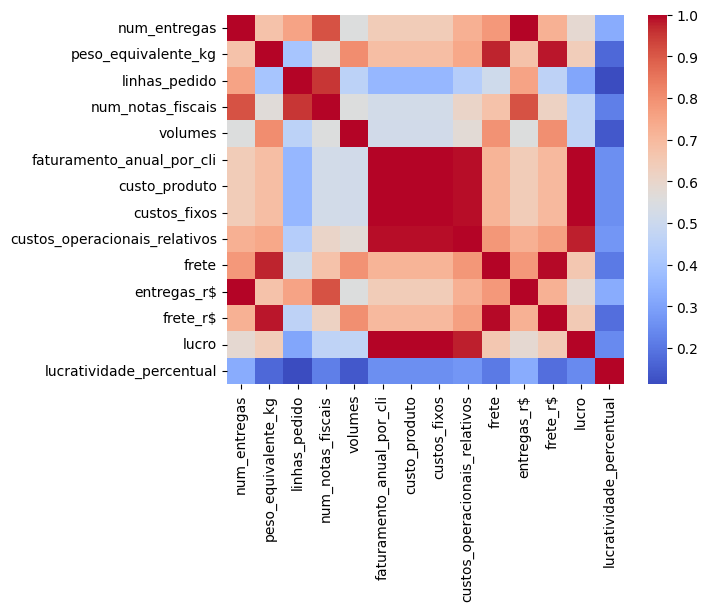

In [16]:
df_num = df.drop(columns=['mercado', 'nome_cliente', 'cidade'])
corr = df_num.corr()
sns.heatmap(corr, cmap='coolwarm')
#vemos um foco no meio em que o faturamento anual está fortemente relacionado lucro, custos fixos, custos relativos, custos operacionais
#peso tem relação com frete peso

In [17]:
#faturamento anual
df_fat_anual_total = df['faturamento_anual_por_cli'].sum()
df_fat_anual_total_f = f"{df_fat_anual_total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print("O faturamento anual da empresa é:", f"R$ {df_fat_anual_total_f}")

O faturamento anual da empresa é: R$ 12.866.135,16


In [18]:
#lucro total
df_lucro = df['lucro'].sum()
df_lucro_f = f"{df_lucro:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print("O lucro total da empresa no mês passado foi de:", f"R$ {df_lucro_f}")

O lucro total da empresa no mês passado foi de: R$ 2.711.632,90


In [19]:
#pedidos no mês
pedidos_totais = df['linhas_pedido'].sum()
print("A quantidade de pedidos por mês é a seguinte:", pedidos_totais)

A quantidade de pedidos por mês é a seguinte: 17232


#5. Seção de Análise de de Clientes

In [21]:
#Contagem da quantidade de clientes
qtd_clientes = df['nome_cliente'].count()
print(f"há {qtd_clientes} clientes na base de dados")

há 145 clientes na base de dados


/tmp/ipython-input-2256465272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Cliente')

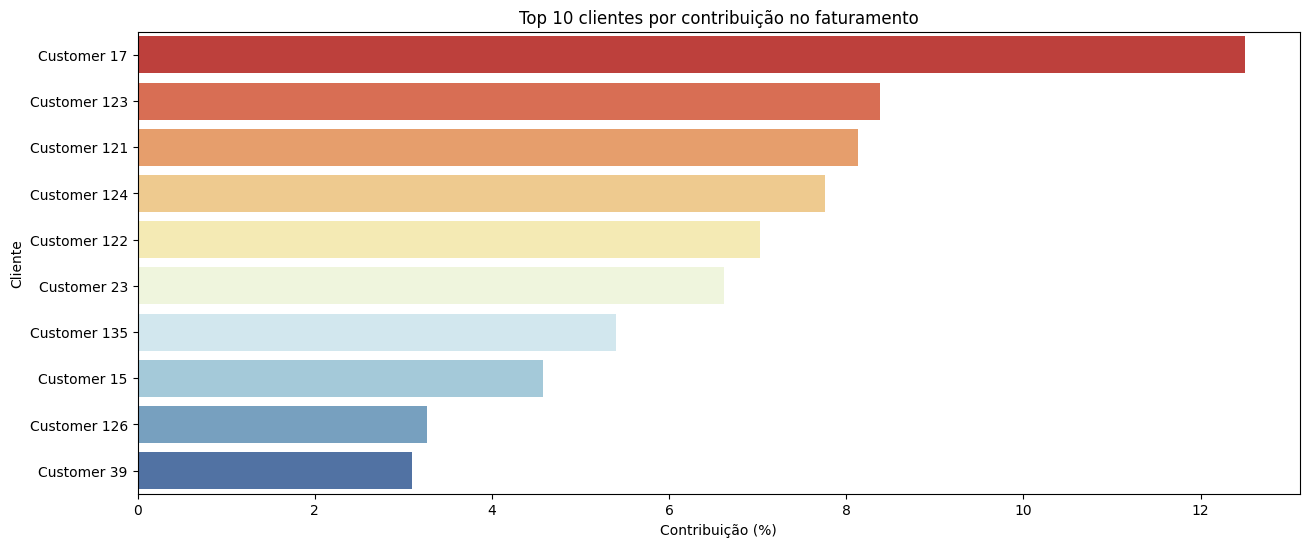

In [64]:
# Cálculo da contribuição
df['contribuicao_clientes'] = df['faturamento_anual_por_cli'] * 100 / df_fat_anual_total

# Top 10 clientes com maior contribuição
top_clientes = df.nlargest(10, 'contribuicao_clientes')

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(
    y="nome_cliente",
    x="contribuicao_clientes",
    data=top_clientes,
    palette="RdYlBu"
)
plt.title("Top 10 clientes por contribuição no faturamento")
plt.xlabel("Contribuição (%)")
plt.ylabel("Cliente")

In [24]:
#Porcentagem de clientes com lucratividade negativa
lucratividade_neg = (df['lucratividade_percentual'] < 0).sum()
qtd_clientes = df['nome_cliente'].count()
porcentagem_preju = (lucratividade_neg / qtd_clientes) * 100
print(f"{round(porcentagem_preju,2)} % dos clientes da empresa tiveram lucratividade negativa")
#listar esses clientes

46.21 % dos clientes da empresa tiveram lucratividade negativa


In [122]:
#quem sao os clientes com a lucratividade negativa
clientes_prejuizo = df.loc[df['lucro'] < 0, ['nome_cliente', 'cidade', 'lucro']]
print(clientes_prejuizo)

     nome_cliente           cidade        lucro
1      Customer 2       EMBU-GUACU -1138.414125
8      Customer 9          DIADEMA  -682.830715
10    Customer 11  ITAPEC DA SERRA -1953.847558
19    Customer 20          POMPEIA  -671.002680
23    Customer 24             MAUA -2243.081393
..            ...              ...          ...
136  Customer 137        SAO PAULO  -718.827768
137  Customer 138  STA BARB DOESTE -1437.519773
138  Customer 139           FRANCA -1490.221405
139  Customer 140        SAO PAULO -2114.571248
142  Customer 143           SANTOS -2103.487873

[67 rows x 3 columns]


In [123]:
moda_cidade = clientes_prejuizo['cidade'].mode()
print(moda_cidade)

0    SAO PAULO
Name: cidade, dtype: object


In [108]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual', 'contribuicao_pct',
       'contribuicao_clientes'],
      dtype='object')

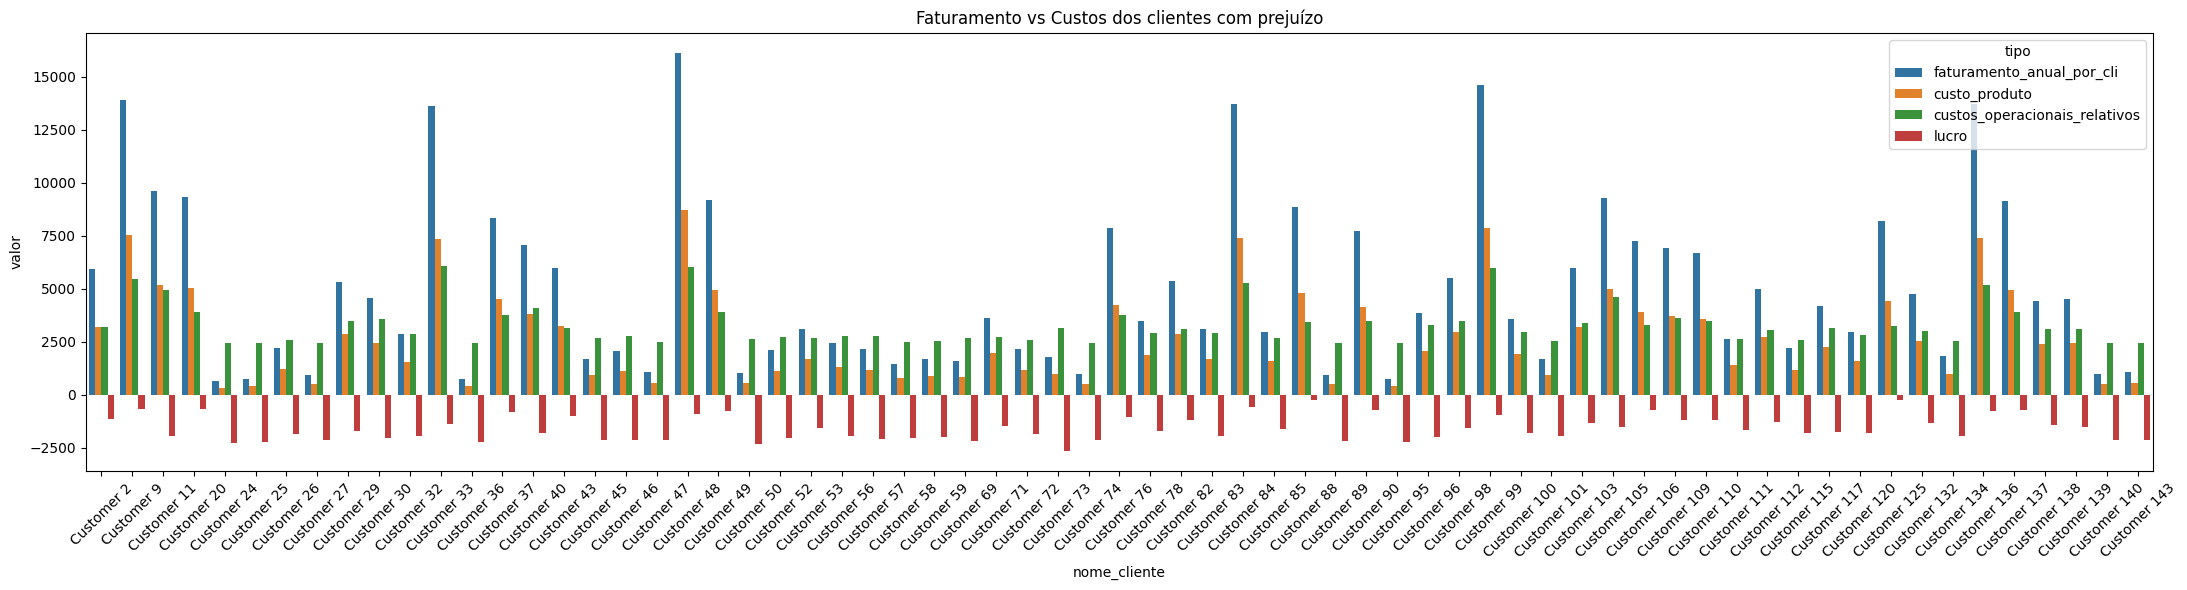

In [116]:
df_preju = df[df['lucro'] < 0]

df_preju_melt = df_preju.melt(
    id_vars=['nome_cliente'],  value_vars=['faturamento_anual_por_cli', 'custo_produto', 'custos_operacionais_relativos', 'lucro'],
    var_name='tipo',
    value_name='valor'
)

plt.figure(figsize=(22,6))
sns.barplot(data=df_preju_melt, x='nome_cliente', y='valor', hue='tipo')
plt.xticks(rotation=45)
plt.title("Faturamento vs Custos dos clientes com prejuízo")
plt.tight_layout()
plt.show()

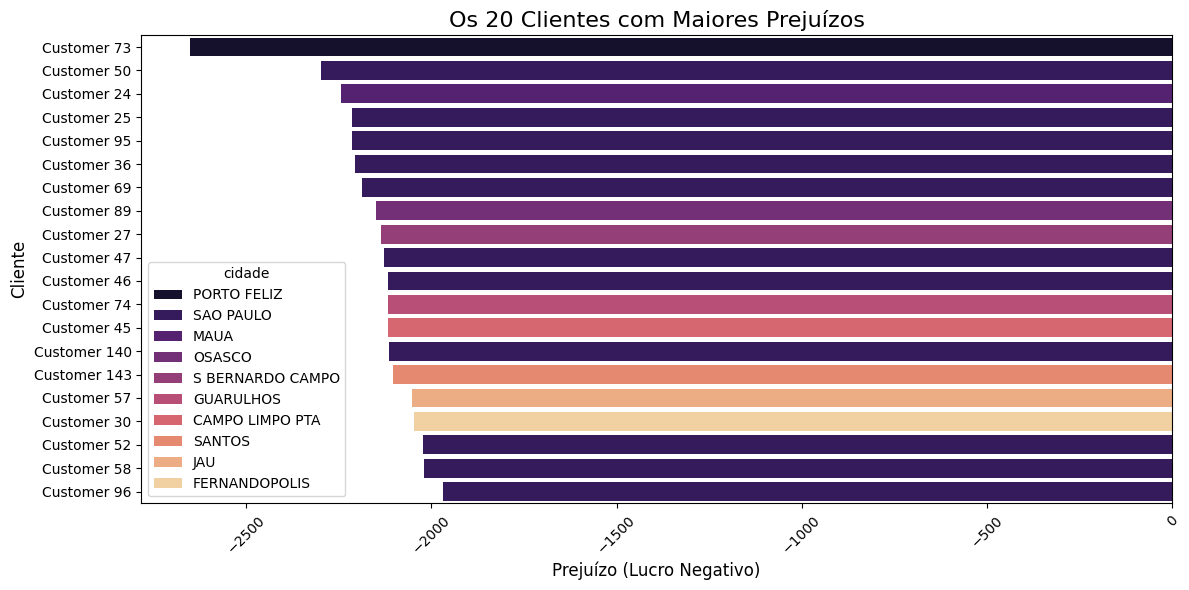

In [26]:
clientes_prejuizo = df.loc[df['lucro'] < 0, ['nome_cliente', 'cidade', 'lucro']]

# Ordenar pelos maiores prejuízos
clientes_prejuizo = clientes_prejuizo.sort_values(by='lucro').head(20)

# Criar o gráfico os 20 maiores prejuízos
plt.figure(figsize=(12, 6))
sns.barplot(x='lucro', y='nome_cliente', hue='cidade',
            data=clientes_prejuizo, palette='magma')

plt.title('Os 20 Clientes com Maiores Prejuízos', fontsize=16)
plt.xlabel('Prejuízo (Lucro Negativo)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Top 10 Clientes com Lucro Positivo - Entregas vs Faturamento')

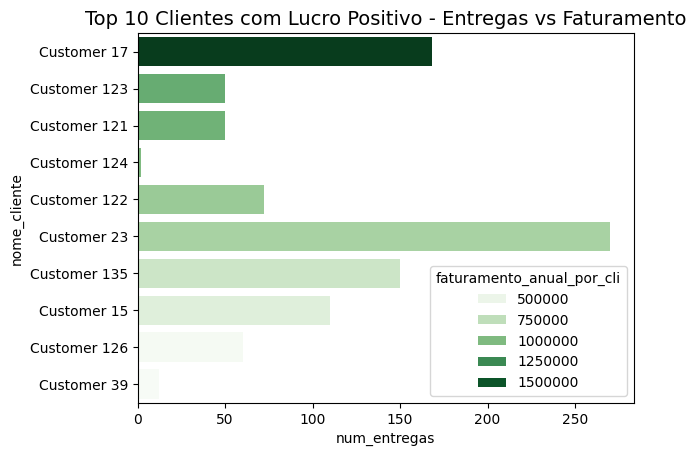

In [27]:
#clientes com lucro positivo
retorno_clientes_lc = df[(df.lucro > 1)].sort_values(by='faturamento_anual_por_cli', ascending=False)
retorno_clientes_lc.round(2)

#ver os clientes, numero de entregas e peso
client_pos = retorno_clientes_lc.loc[:, ['nome_cliente', 'num_entregas', 'faturamento_anual_por_cli']].head(10)

sns.barplot(data=client_pos, x="num_entregas", y="nome_cliente", hue="faturamento_anual_por_cli", palette="Greens")
plt.title("Top 10 Clientes com Lucro Positivo - Entregas vs Faturamento", fontsize=14)

Text(0.5, 1.0, 'Top 10 Clientes com Lucro Negativo - Entregas vs Faturamento')

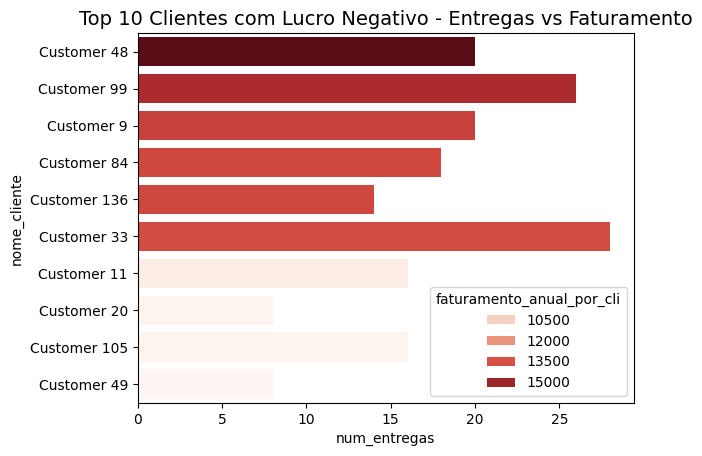

In [28]:
#clientes com lucro negativo
retorno_clientes_prej = df[(df['lucro'] < 0)].sort_values(by='faturamento_anual_por_cli', ascending=False)
#ver os clientes, numero de entregas e peso
client_prej = retorno_clientes_prej.loc[:, ['nome_cliente', 'num_entregas', 'faturamento_anual_por_cli']].head(10)

sns.barplot(data=client_prej, x="num_entregas", y="nome_cliente", hue="faturamento_anual_por_cli", palette="Reds")
plt.title("Top 10 Clientes com Lucro Negativo - Entregas vs Faturamento", fontsize=14)

In [65]:
df.columns

Index(['mercado', 'nome_cliente', 'cidade', 'num_entregas',
       'peso_equivalente_kg', 'linhas_pedido', 'num_notas_fiscais', 'volumes',
       'faturamento_anual_por_cli', 'custo_produto', 'custos_fixos',
       'custos_operacionais_relativos', 'frete', 'entregas_r$', 'frete_r$',
       'lucro', 'lucratividade_percentual', 'contribuicao_pct',
       'contribuicao_clientes'],
      dtype='object')

In [29]:
#clientes que a soma de todos custos são maiores que o faturamento anual e o lucro é negativo
custos_totais_cli = df['custo_produto'] + df['custos_fixos'] + df['custos_operacionais_relativos']
df[(df['faturamento_anual_por_cli'] < custos_totais_cli) & (df.lucro < 0)]

,mercado,nome_cliente,cidade,num_entregas,peso_equivalente_kg,linhas_pedido,num_notas_fiscais,volumes,faturamento_anual_por_cli,custo_produto,custos_fixos,custos_operacionais_relativos,frete,entregas_r$,frete_r$,lucro,lucratividade_percentual
1,Têxtil,Customer 2,EMBU-GUACU,4,1119.8125,8,4,44,5939.8750,3207.53250,516.769125,3203.98750,150.0,33.2,116.8,-1138.414125,-0.191656
8,Têxtil,Customer 9,DIADEMA,20,1462.5725,40,20,58,13909.0450,7510.88430,1210.086915,5470.90450,400.0,166.0,234.0,-682.830715,-0.049093
10,Têxtil,Customer 11,ITAPEC DA SERRA,16,3410.0725,40,18,372,9603.1225,5185.68615,835.471657,4928.31225,607.5,132.8,474.7,-1953.847558,-0.203460
19,Têxtil,Customer 20,POMPEIA,8,1038.0175,24,8,72,9316.8400,5031.09360,810.565080,3923.68400,222.5,66.4,156.1,-671.002680,-0.072020
23,Têxtil,Customer 24,MAUA,2,13.6325,4,2,2,640.7275,345.99285,55.743293,2432.07275,50.0,16.6,33.4,-2243.081393,-3.500835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Têxtil,Customer 137,SAO PAULO,8,144.1150,20,8,10,9112.3525,4920.67035,792.774667,3895.23525,222.5,66.4,156.1,-718.827768,-0.078885
137,Têxtil,Customer 138,STA BARB DOESTE,6,276.5450,12,6,12,4426.6675,2390.40045,385.120072,3088.66675,0.0,49.8,-49.8,-1437.519773,-0.324741
138,Têxtil,Customer 139,FRANCA,6,130.4825,12,6,4,4506.5150,2433.51810,392.066805,3128.65150,42.5,49.8,-7.3,-1490.221405,-0.330682
139,Têxtil,Customer 140,SAO PAULO,2,101.2700,4,2,10,979.5925,528.97995,85.224547,2449.95925,30.0,16.6,13.4,-2114.571248,-2.158623


#6. Seção de Análise de localidade e custo operacional de fretes

In [33]:
#Vejo todas as cidades existentes no banco de dados
df["cidade"].unique()

array(['DIADEMA', 'EMBU-GUACU', 'SAO PAULO', 'SAO CAETANO SUL', 'OSASCO',
       'ITAPEC DA SERRA', 'FERRAZ VASCONCELOS', 'CAIEIRAS', 'RIO CLARO',
       'LOUVEIRA', 'POMPEIA', 'BARUERI', 'FRANCA', 'MAUA', 'AURIFLAMA',
       'S BERNARDO CAMPO', 'AMERICANA', 'FERNANDOPOLIS', 'NOVA ODESSA',
       'SANTOS', 'BIRIGUI', 'SAO ROQUE', 'COTIA', 'JAU', 'GUARULHOS',
       'SOROCABA', 'CAMPINAS', 'CAMPO LIMPO PTA', 'SANTO ANDRE',
       'JOSE BONIFACIO', 'MOCOCA', 'JACAREI', 'MORUNGABA', 'BASTOS',
       'PORTO FELIZ', 'POA', 'PIRACAIA', 'INDAIATUBA', 'CABREUVA',
       'ARARAQUARA', 'VOTUPORANGA', 'LEME', 'S J RIO PRETO',
       'SAO VICENTE', 'ITATIBA', 'MOGI-MIRIM', 'SAO CARLOS',
       'STA BARB DOESTE', 'ARTUR NOGUEIRA', 'IBITINGA', 'SUMARE'],
      dtype=object)

In [34]:
#Quantas cidades existem, sem repetição(unique), qual a cidade que mais aparece e a frequência com que ela aparece
df["cidade"].describe()

,cidade
count,145
unique,51
top,SAO PAULO
freq,48


In [35]:
#Quantas vezes cada cidade se repete no banco de dados
df["cidade"].value_counts()

,count
cidade,
SAO PAULO,48
AMERICANA,10
DIADEMA,6
FRANCA,6
GUARULHOS,5
BIRIGUI,4
OSASCO,3
CAMPINAS,3
JAU,3


In [60]:
# Filtra as cidades com clientes que contribuíram com mais de 1% de contribuição no faturamento
faturamento_total = df['faturamento_anual_por_cli'].sum()

df['contribuicao_pct'] = (df['faturamento_anual_por_cli'] / faturamento_total) * 100

clientes_acima_1 = df[(df.lucro > 1)].sort_values(by='faturamento_anual_por_cli', ascending=False)
clientes_acima_1 = df[(df['lucro'] > 1) & (df['contribuicao_pct'] > 1)]
contribuicao_por_cidade = clientes_acima_1['cidade'].value_counts()


print("Número de clientes com contribuição > 1% por cidade:")
print(contribuicao_por_cidade)

Número de clientes com contribuição > 1% por cidade:
cidade
SAO PAULO         5
AMERICANA         3
FRANCA            2
DIADEMA           1
RIO CLARO         1
CAIEIRAS          1
GUARULHOS         1
MOGI-MIRIM        1
ARTUR NOGUEIRA    1
JAU               1
Name: count, dtype: int64


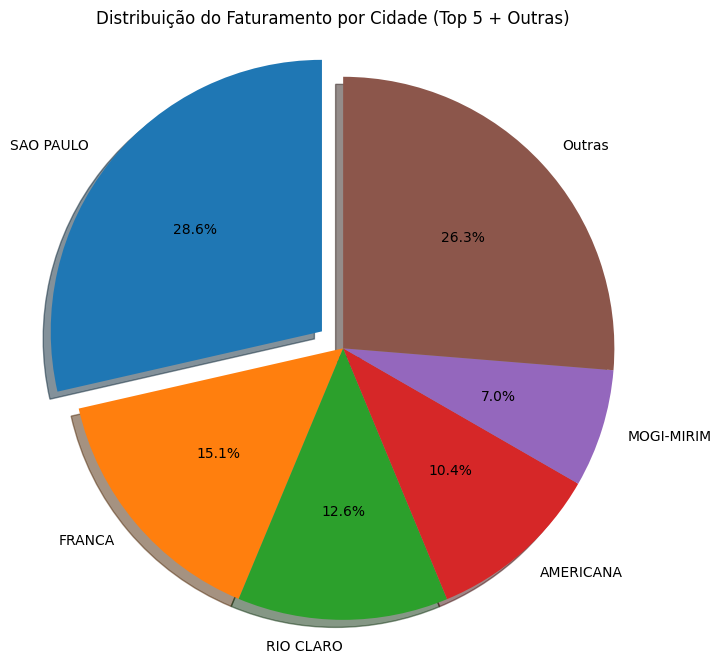

In [137]:
# Agrupar por cidade e somar o faturamento
df_agrupado = df.groupby('cidade')['faturamento_anual_por_cli'].sum().sort_values(ascending=False)

# Separar as top 5 cidades e agrupar o restante como "Outras"
top5 = df_agrupado.head(5)
outras = pd.Series({'Outras': df_agrupado[5:].sum()})

dados_grafico = pd.concat([top5, outras])

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(dados_grafico,
       labels=dados_grafico.index,
       autopct='%1.1f%%',
       startangle=90,
       shadow=True,
       explode=[0.1 if i == 0 else 0 for i in range(len(dados_grafico))])  # Destacar a primeira fatia

ax.axis('equal')
plt.title('Distribuição do Faturamento por Cidade (Top 5 + Outras)')
plt.show()

/tmp/ipython-input-194871211.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entregas_por_cidade,


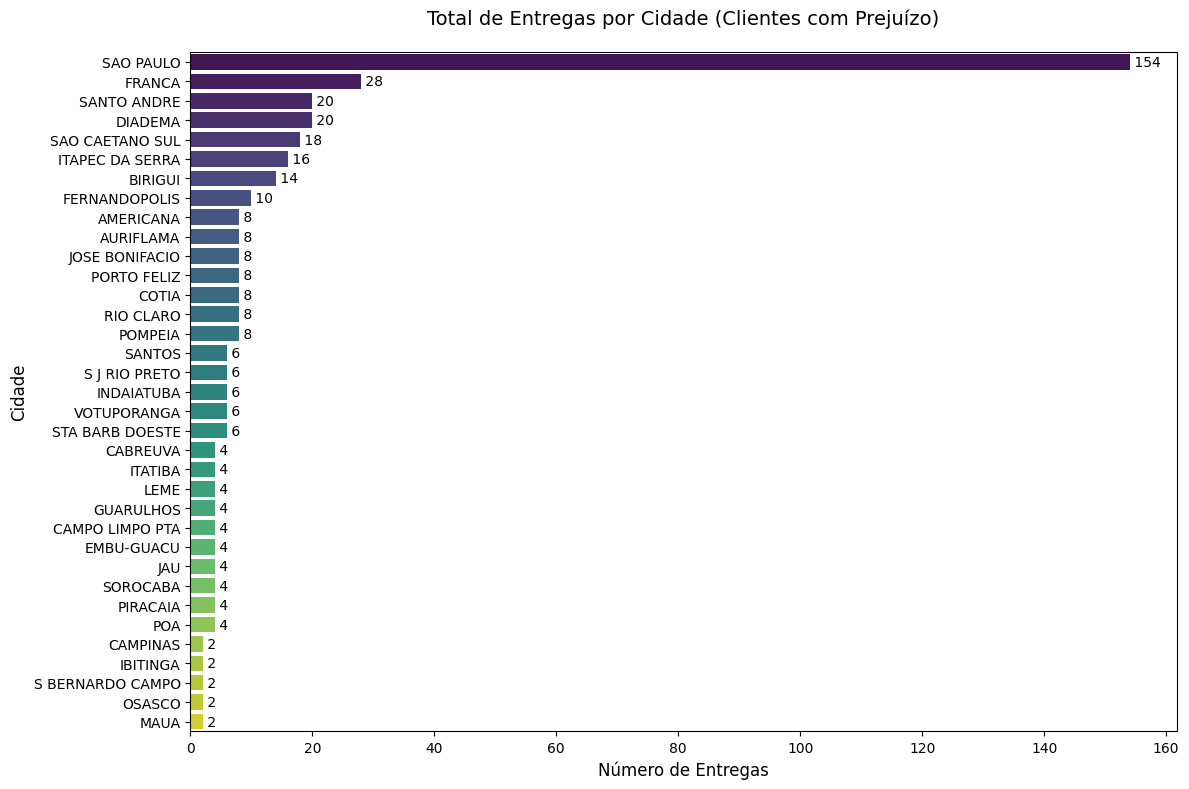

In [138]:
# Filtrar clientes com prejuízo
cli_negativados = df[(df['faturamento_anual_por_cli'] < custos_totais_cli) & (df.lucro < 0)]

entregas_por_cidade = cli_negativados.groupby('cidade')['num_entregas'].sum().sort_values(ascending=False).reset_index()

# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=entregas_por_cidade,
            x='num_entregas',
            y='cidade',
            palette="viridis",  # Escala de cores sequencial (quanto mais escuro, mais entregas)
            orient='h')

plt.title("Total de Entregas por Cidade (Clientes com Prejuízo)", fontsize=14, pad=20)
plt.xlabel("Número de Entregas", fontsize=12)
plt.ylabel("Cidade", fontsize=12)

for index, value in enumerate(entregas_por_cidade['num_entregas']):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.show()

In [37]:
#máximo e mínimo de lucro por cidade
var_lucro_cidades = df.groupby(['cidade']).lucro.agg(["min", "max"])
round(var_lucro_cidades,2)

,min,max
cidade,,
AMERICANA,-690.32,166349.12
ARARAQUARA,3452.82,3452.82
ARTUR NOGUEIRA,63709.81,63709.81
AURIFLAMA,-1818.40,-1162.10
BARUERI,2173.22,2242.40
BASTOS,385.58,385.58
BIRIGUI,-756.00,1619.74
CABREUVA,-1778.55,-1778.55
CAIEIRAS,24314.39,137274.87


In [139]:
#o máximo e mínimo de lucro por quantidade de entrega em ordem decrescente
#De 40 entregas para cima obtivemos lucro positivo, já menores quantidades de entrega geram prejuízo
var_entregas = df.groupby(['num_entregas']).lucro.agg(["min", "max"])
round(var_entregas,2).sort_values(by='min',ascending=False)

,min,max
num_entregas,,
50,277185.41,286000.78
72,235801.99,235801.99
270,183952.61,183952.61
150,166349.12,166349.12
110,137274.87,137274.87
64,63709.81,63709.81
36,55594.59,55594.59
68,41287.05,41287.05
58,32433.85,35015.98
